In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import viz

COLORS, PAGE_WIDTH, ROW_HEIGHT = viz.set_plots()

def rolling_mean(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


In [3]:
prices = pd.read_csv("../data/prices.csv", index_col=0, parse_dates=True)
prices2023 = prices.loc[
        f"2023-01-01" :f"2023-01-31"
    ].lmp

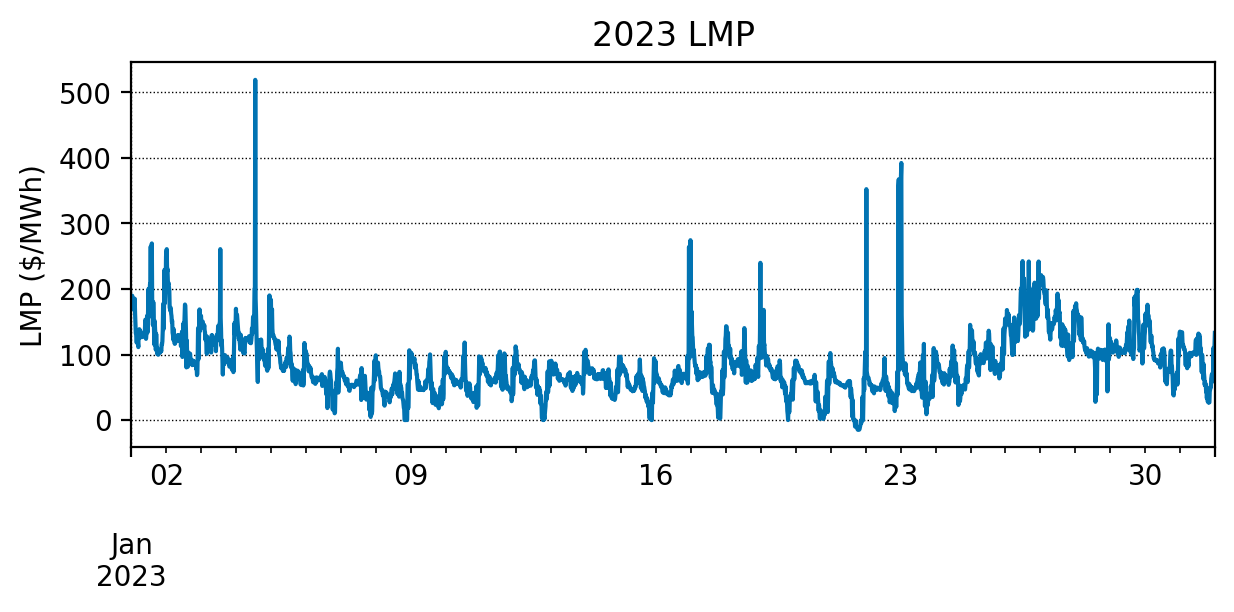

In [4]:
f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
prices2023.plot(ax=ax)
ax.set_title("2023 LMP")
ax.set_ylabel("LMP ($/MWh)")
plt.show()

In [13]:
from ppoRun import main as ppoMain
ppoMain(nYears = None, nMonths = 5, month = [1], test = 1, NEpisodes = 10, num_batches = 1200)

100%|██████████| 1200/1200 [21:01<00:00,  1.05s/it]


0
Profit: 10796.106461016057
Mean profit: 10796.106461016057


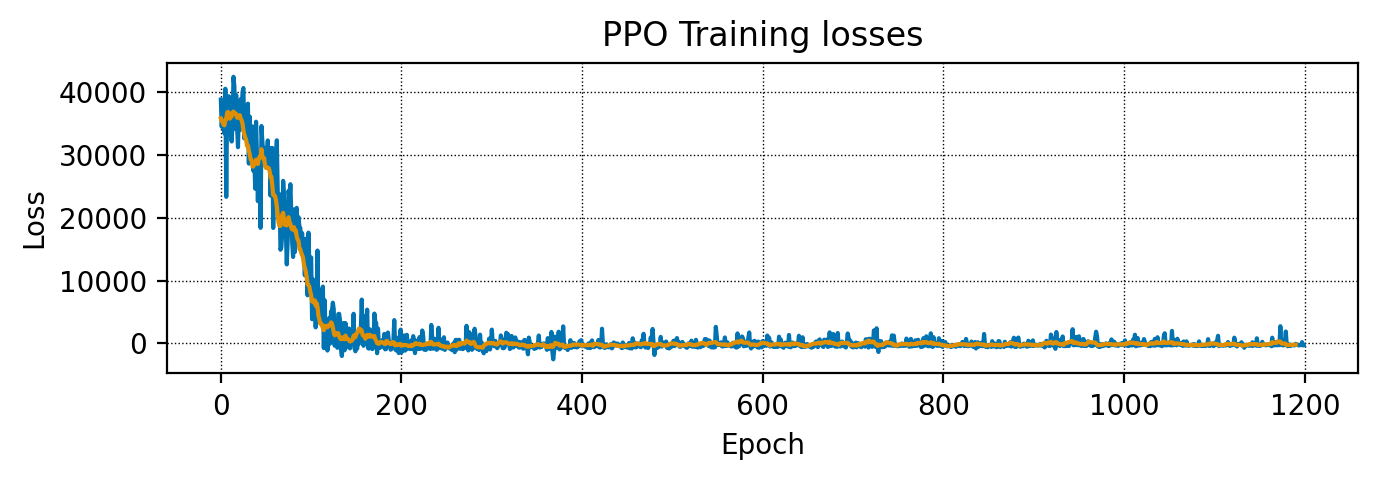

In [14]:
losses = np.load("PPOResults/ppo_losses.npy")

f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
ax.plot(losses, label="Loss")
ax.plot(rolling_mean(losses, 10), label="Rolling Mean")
ax.set_title("PPO Training losses")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.tight_layout()
f.savefig("PGResults/pg_losses.png")
plt.show()

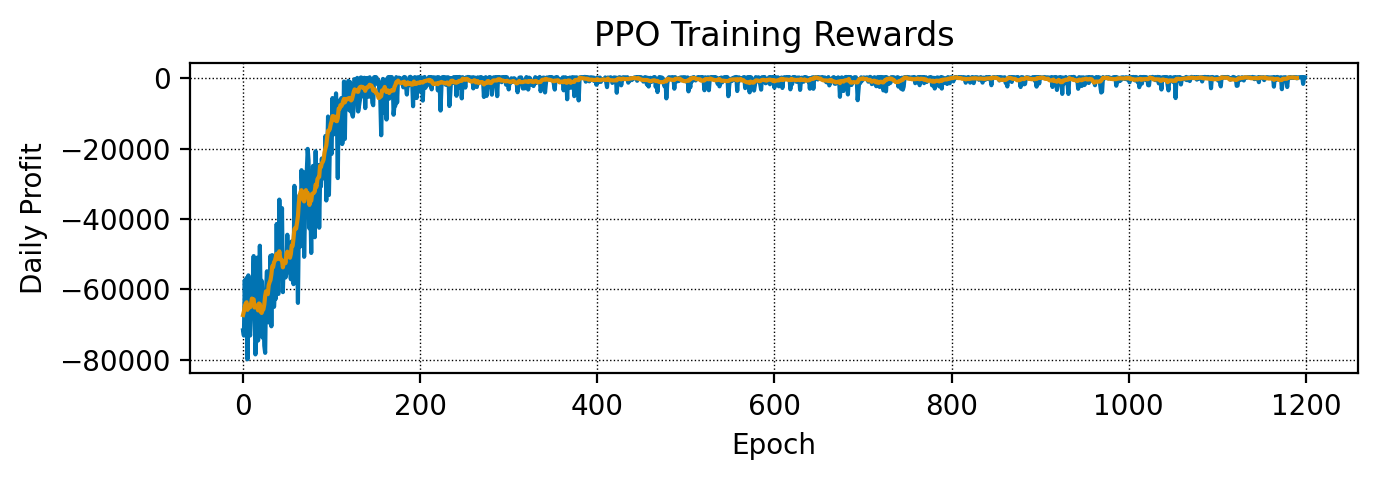

In [15]:
rewards = np.load("PPOResults/ppo_rewards.npy")

f, ax = plt.subplots(1, 1, figsize=(PAGE_WIDTH, ROW_HEIGHT))
ax.plot(rewards, label="rewards")
ax.plot(rolling_mean(rewards, 10), label="Rolling Mean")
ax.set_title("PPO Training Rewards")
ax.set_xlabel("Epoch")
ax.set_ylabel("Daily Profit")
plt.tight_layout()
f.savefig("PGResults/pg_rewards.png")
plt.show()

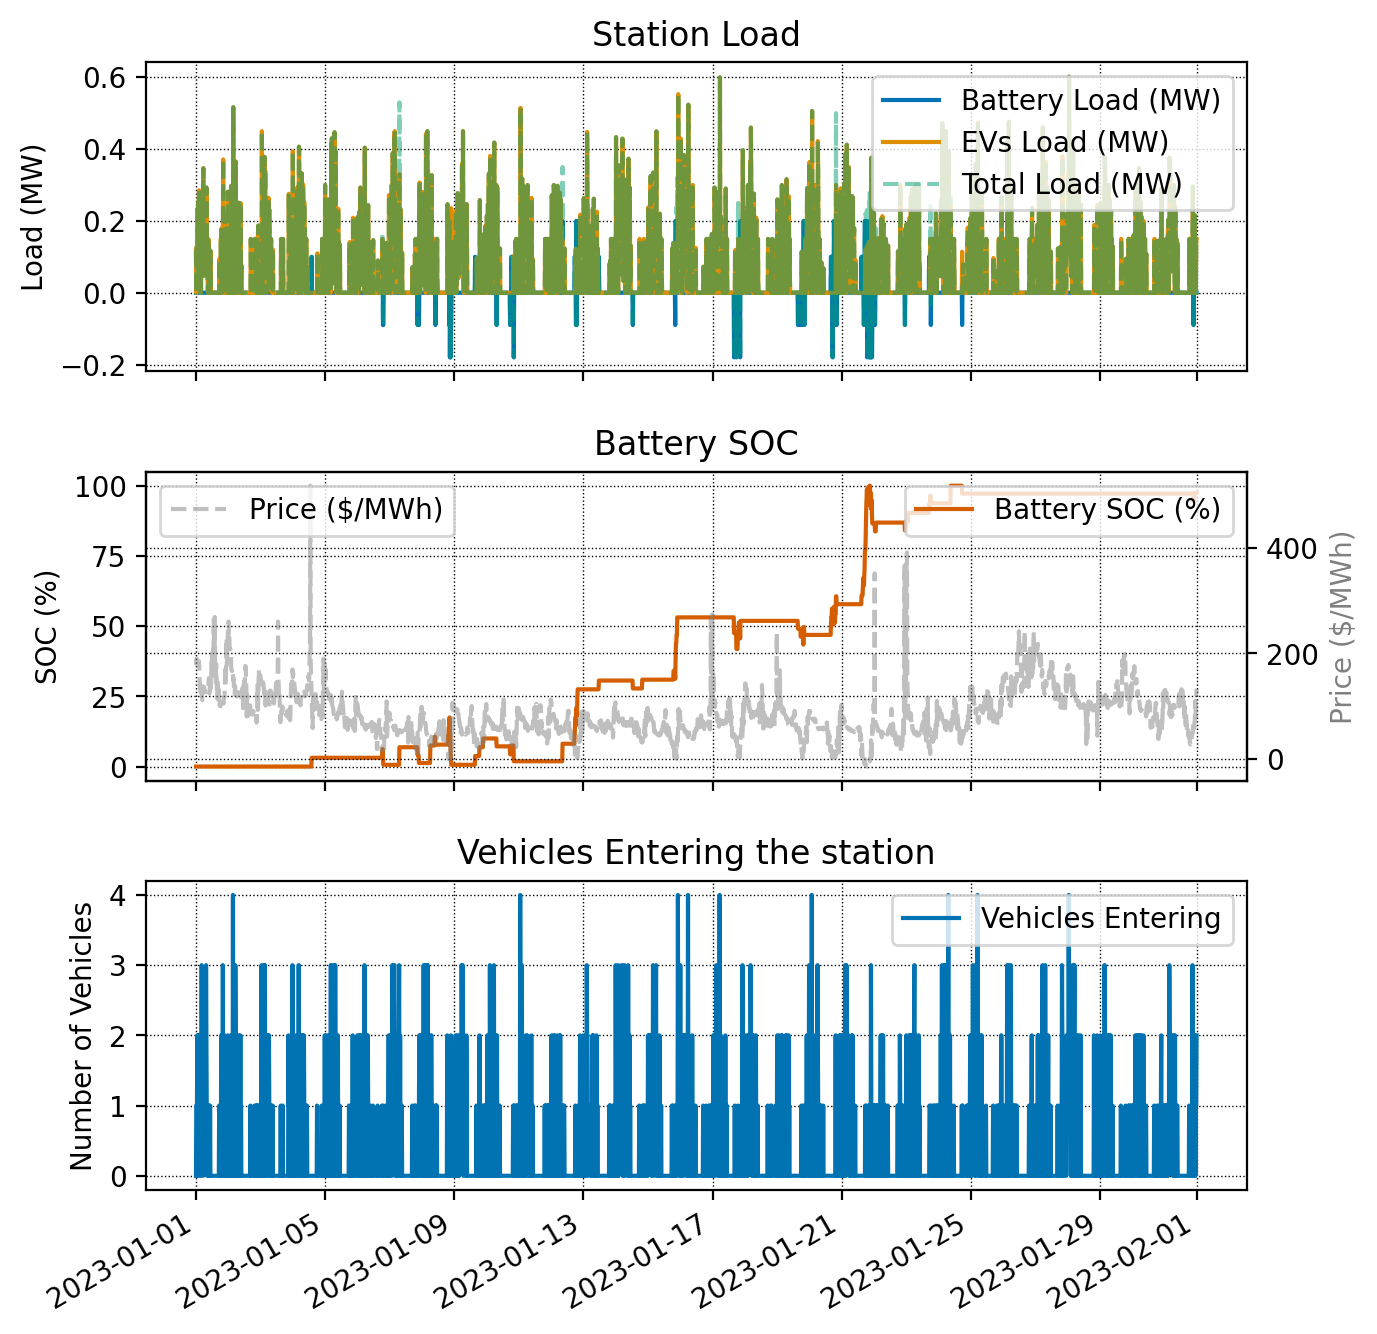

In [16]:
history = pd.read_csv("PPOResults/ppo_history.csv", index_col=0, parse_dates=True)

START, END = "2023-01-01", "2023-01-31"

viz.plotOperations(history, START, END, save_path="PPOResults/policy.png")

In [17]:
history.invalidAction.sum()

11

In [18]:
history

,time,SOC,load,load Batt,load EVs,cost,reward,rewardTrain,newEVs,price,invalidAction
2023-01-01 00:00:00+00:00,48,0.000,0.117404,0.0,0.117404,5.232075,3.573232,3.573232,0,178.25868,False
2023-01-01 00:15:00+00:00,49,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1,189.68090,False
2023-01-01 00:30:00+00:00,50,0.000,0.128489,0.0,0.128489,6.095979,3.540667,3.540667,1,189.77493,False
2023-01-01 00:45:00+00:00,51,0.000,0.107530,0.0,0.107530,5.045276,3.019500,3.019500,1,187.67822,False
2023-01-01 01:00:00+00:00,52,0.000,0.071589,0.0,0.071589,3.205623,2.163566,2.163566,2,179.11215,False
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 22:45:00+00:00,43,0.975,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1,110.14000,False
2023-01-31 23:00:00+00:00,44,0.975,0.150000,0.0,0.150000,2.969453,8.280548,8.280548,0,79.18540,False
2023-01-31 23:15:00+00:00,45,0.975,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1,94.89488,False
2023-01-31 23:30:00+00:00,46,0.975,0.141239,0.0,0.141239,4.036957,6.555975,6.555975,1,114.32974,False


In [19]:
from ppo import PPO
from tqdm import tqdm
rewards = []
max_power = []
for _ in tqdm(range(100)):
    PolicyPPO = PPO([], 0, 0)
    pricesTest = pd.concat([prices2023[-4:], prices2023])
    history = PolicyPPO.test(pricesTest)
    rewards.append(history.reward.sum())
    max_power.append(history.load.max())
    # print(history.reward.sum())

print("Reward Metrics: ", np.mean(rewards), "$")
print("Max Power Metrics: ", np.mean(max_power), "MW")


100%|██████████| 100/100 [05:28<00:00,  3.28s/it]

Reward Metrics:  11322.582153385914 $
Max Power Metrics:  0.6472440491399211 MW
